Import the 🦸🏾‍♀️"Avengers"🦹🏻 data from the [FiveThirtyEight data repository on GitHub](https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv).

In [8]:
library('tidyverse')
library('ggrepel')
library('patchwork')
library('scales')
options(repr.plot.res = 300, repr.plot.width = 7, repr.plot.height = 4)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [10]:
avengers = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv',
                   col_types=cols())
avengers

URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,⋯,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NA,Sep-63,1963,52,Full,⋯,NO,NA,NA,NA,NA,NA,NA,NA,NA,Merged with Ultron in Rage of Ultron Vol. 1. A funeral was held.
http://marvel.wikia.com/Janet_van_Dyne_(Earth-616),Janet van Dyne,1165,YES,FEMALE,NA,Sep-63,1963,52,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,Dies in Secret Invasion V1:I8. Actually was sent tto Microverse later recovered
http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NA,Sep-63,1963,52,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,"Death: ""Later while under the influence of Immortus Stark committed a number of horrible acts and was killed.' This set up young Tony. Franklin Richards later brought him back"
http://marvel.wikia.com/Robert_Bruce_Banner_(Earth-616),Robert Bruce Banner,2089,YES,MALE,NA,Sep-63,1963,52,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,"Dies in Ghosts of the Future arc. However ""he had actually used a hidden Pantheon base to survive"""
http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NA,Sep-63,1963,52,Full,⋯,YES,YES,NO,NA,NA,NA,NA,NA,NA,Dies in Fear Itself brought back because that's kind of the whole point. Second death in Time Runs Out has not yet returned
http://marvel.wikia.com/Richard_Jones_(Earth-616),Richard Milhouse Jones,612,YES,MALE,NA,Sep-63,1963,52,Honorary,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
http://marvel.wikia.com/Steven_Rogers_(Earth-616),Steven Rogers,3458,YES,MALE,NA,Mar-64,1964,51,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,Dies at the end of Civil War. Later comes back.
http://marvel.wikia.com/Clint_Barton_(Earth-616),Clinton Francis Barton,1456,YES,MALE,NA,May-65,1965,50,Full,⋯,YES,YES,YES,NA,NA,NA,NA,NA,NA,Dies in exploding Kree ship in Averngers Vol. 1 Issue 502. Brought back by Scarlet Witch. Dies again in House of M Vol 1 Issue 7. Is later brought back.
http://marvel.wikia.com/Pietro_Maximoff_(Earth-616),Pietro Maximoff,769,YES,MALE,NA,May-65,1965,50,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,Dies in House of M Vol 1 Issue 7. Later comes back


Make an ECDF plot 📊 of `Appearances`.

(❗️Hint: combine `arrange`, `mutate` and `row_number`/`rank` to produce a new column to encode with y-position.)

In [18]:
ecdf = avengers %>%
    arrange(Appearances) %>%
    mutate(rn = row_number(), fraction_of_appearances = rn / n())%>% #can toggle this line with the next 2
    #mutate(fraction_of_appearances = rank(Appearances, ties.method = 'random')/n()) %>%
    #arrange(fraction_of_appearances)
    select(Appearances, rn, fraction_of_appearances, `Name/Alias`)
ecdf

Appearances,rn,fraction_of_appearances,Name/Alias
<dbl>,<int>,<dbl>,<chr>
2,1,0.005780347,Moira Brandon
2,2,0.011560694,Fiona
3,3,0.017341040,Doug Taggert
4,4,0.023121387,Gene Lorrene
6,5,0.028901734,Dennis Sykes
7,6,0.034682081,NA
12,7,0.040462428,Monica Chang
13,8,0.046242775,Alexis
14,9,0.052023121,NA


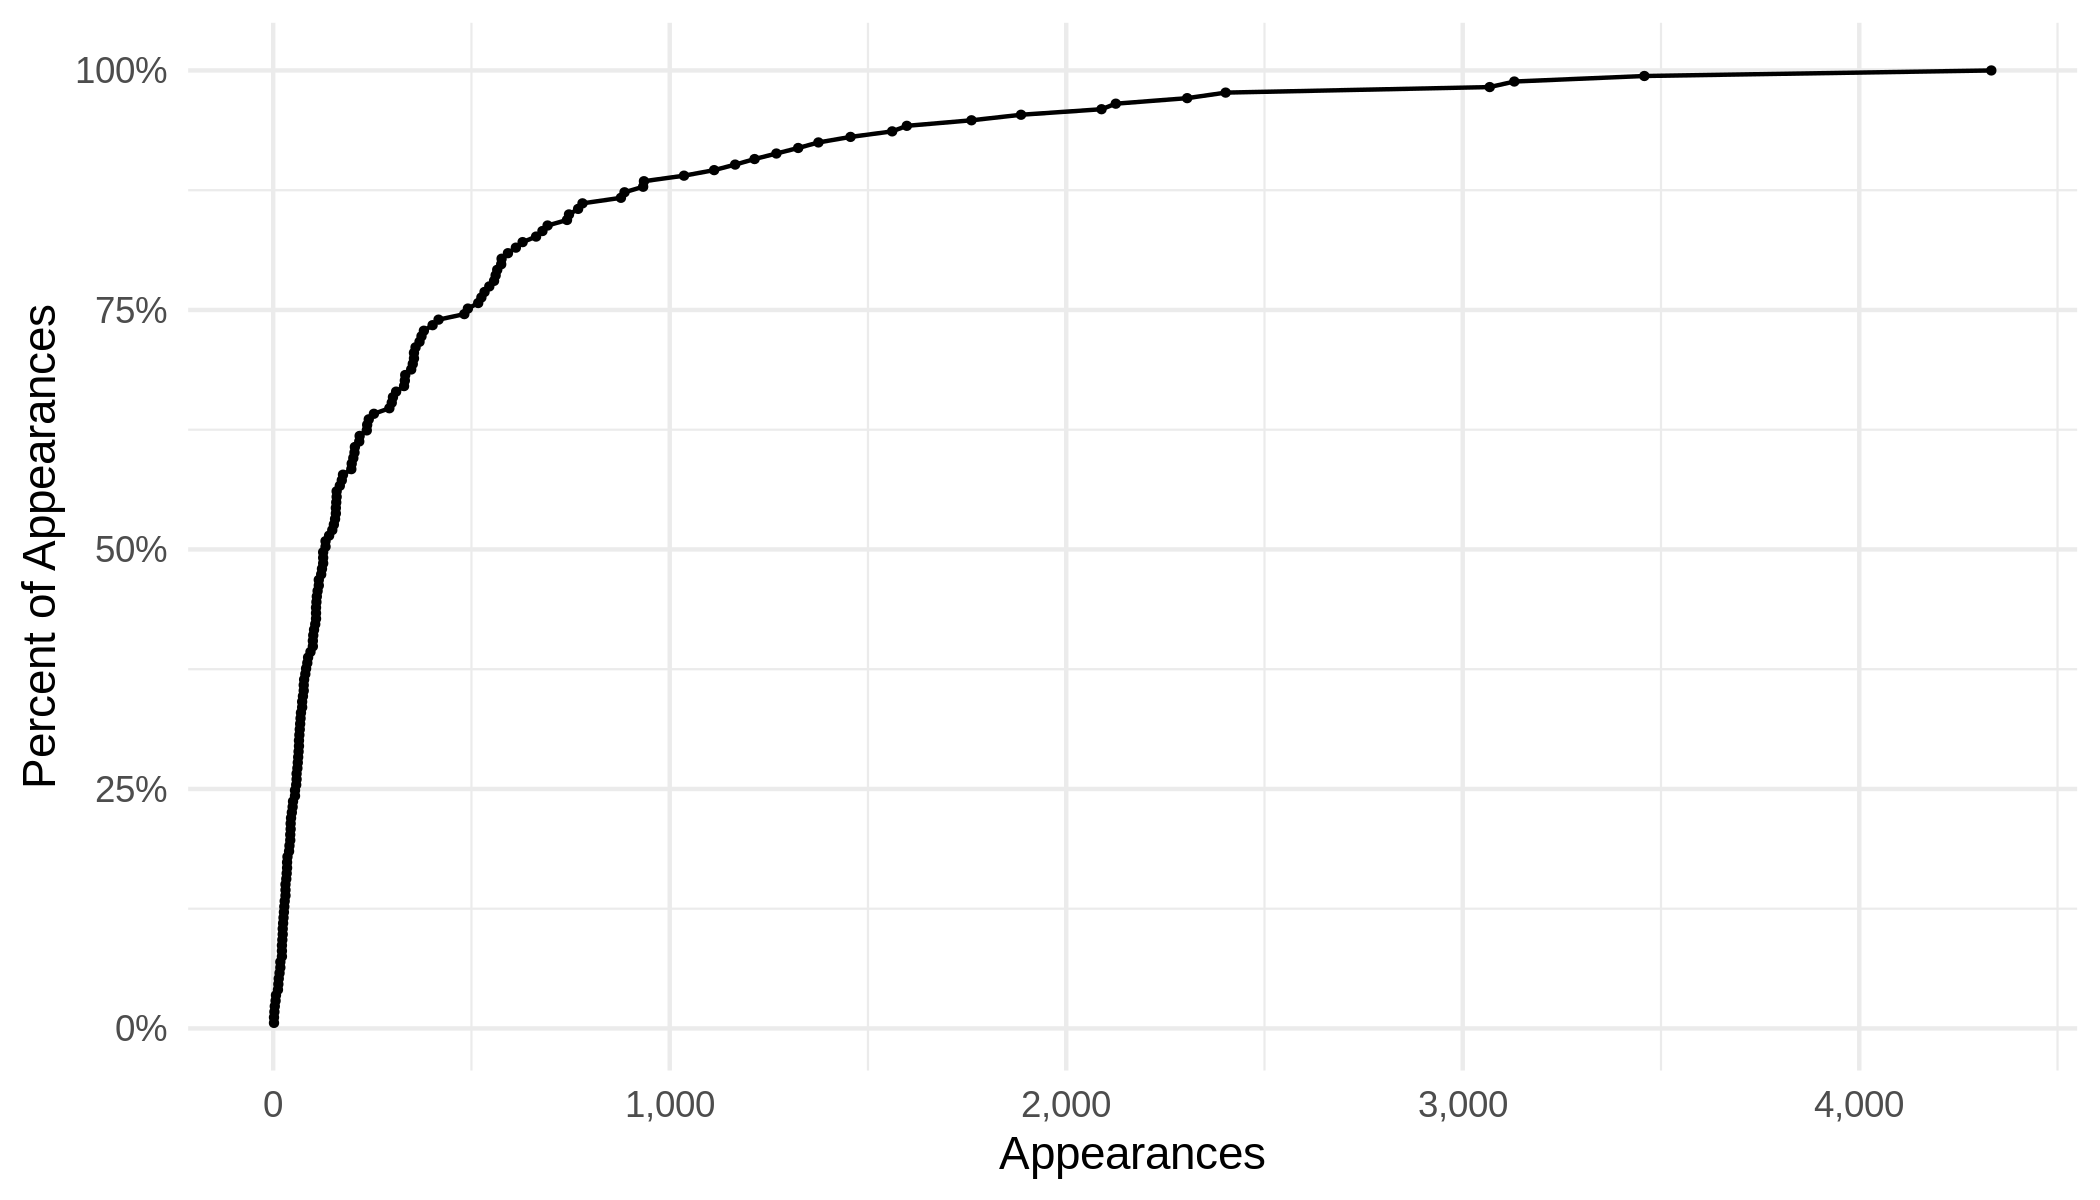

In [14]:
p = ggplot(ecdf, aes(x = Appearances, y = fraction_of_appearances))
p = p + geom_line() + geom_point(size = 0.5) #can also use geom_step()
p = p + scale_y_continuous(labels = percent)
p = p + scale_x_continuous(labels = comma)
p = p + labs(x='Appearances', y = 'Percent of Appearances')
p = p + theme_minimal()
p = p + theme(legend.position="top")
p

In [19]:
ecdf %>%
slice_max(Appearances, n = 4)

Appearances,rn,fraction_of_appearances,Name/Alias
<dbl>,<int>,<dbl>,<chr>
4333,173,1.0000000,Peter Benjamin Parker
3458,172,0.9942197,Steven Rogers
3130,171,0.9884393,"James ""Logan"" Howlett"
3068,170,0.9826590,"Anthony Edward ""Tony"" Stark"
